In [29]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
covid_data=pd.read_csv("/Users/amitkishorea/Downloads/covid_19_india.csv")

In [3]:
covid_data.head(10)

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0   1.0  2020-01-30  6:00 PM               Kerala                       1   
1   2.0  2020-01-31  6:00 PM               Kerala                       1   
2   3.0  2020-02-01  6:00 PM               Kerala                       2   
3   4.0  2020-02-02  6:00 PM               Kerala                       3   
4   5.0  2020-02-03  6:00 PM               Kerala                       3   
5   6.0  2020-02-04  6:00 PM               Kerala                       3   
6   7.0  2020-02-05  6:00 PM               Kerala                       3   
7   8.0  2020-02-06  6:00 PM               Kerala                       3   
8   9.0  2020-02-07  6:00 PM               Kerala                       3   
9  10.0  2020-02-08  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0  
5                        0    0.0     0.0        3.0  
6                        0    0.0     0.0        3.0  
7                        0    0.0     0.0        3.0  
8                        0    0.0     0.0        3.0  
9                        0    0.0     0.0        3.0

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [5]:
covid_data.describe()

Sno         Cured        Deaths     Confirmed
count  15086.000000  1.508600e+04  15086.000000  1.508600e+04
mean    7543.500000  1.747937e+05   2721.084449  1.942820e+05
std     4355.097416  3.648330e+05   7182.672358  4.095184e+05
min        1.000000  0.000000e+00      0.000000  0.000000e+00
25%     3772.250000  1.685000e+03     12.000000  2.935500e+03
50%     7543.500000  1.964700e+04    364.000000  2.608150e+04
75%    11314.750000  2.087552e+05   2170.000000  2.216012e+05
max    15086.000000  4.927480e+06  83777.000000  5.433506e+06

In [6]:
covid_data.drop(["Sno","ConfirmedIndianNational","ConfirmedForeignNational"],inplace = True,axis=1)

In [7]:
covid_data.head()

Date     Time State/UnionTerritory  Cured  Deaths  Confirmed
0  2020-01-30  6:00 PM               Kerala    0.0     0.0        1.0
1  2020-01-31  6:00 PM               Kerala    0.0     0.0        1.0
2  2020-02-01  6:00 PM               Kerala    0.0     0.0        2.0
3  2020-02-02  6:00 PM               Kerala    0.0     0.0        3.0
4  2020-02-03  6:00 PM               Kerala    0.0     0.0        3.0

In [8]:
covid_data["Active cases"]=covid_data["Confirmed"]-(covid_data["Cured"]+covid_data["Deaths"])
covid_data.head()

Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
0  2020-01-30  6:00 PM               Kerala    0.0     0.0        1.0   
1  2020-01-31  6:00 PM               Kerala    0.0     0.0        1.0   
2  2020-02-01  6:00 PM               Kerala    0.0     0.0        2.0   
3  2020-02-02  6:00 PM               Kerala    0.0     0.0        3.0   
4  2020-02-03  6:00 PM               Kerala    0.0     0.0        3.0   

   Active cases  
0           1.0  
1           1.0  
2           2.0  
3           3.0  
4           3.0

In [9]:
statewise = pd.pivot_table(covid_data,index="State/UnionTerritory",values=["Cured","Deaths","Confirmed","Active cases"],aggfunc=max)
statewise

Active cases  Confirmed      Cured  \
State/UnionTerritory                                                           
Andaman and Nicobar Islands                     1154.0     6674.0     6359.0   
Andhra Pradesh                                211554.0  1475372.0  1254291.0   
Arunachal Pradesh                               3068.0    22462.0    19977.0   
Assam                                          47740.0   340858.0   290774.0   
Bihar                                         115152.0   664115.0   595377.0   
Cases being reassigned to states                9265.0     9265.0        0.0   
Chandigarh                                      8653.0    56513.0    48831.0   
Chhattisgarh                                  131245.0   925531.0   823113.0   
Dadra and Nagar Haveli and Daman and Diu        2081.0     9652.0     8944.0   
Daman & Diu                                        2.0        2.0        0.0   
Delhi                                         103424.0  1402873.0  1329899.0   
Goa                                            32953.0   138776.0   112633.0   
Gujarat                                       148297.0   766201.0   660489.0   
Haryana                                       116867.0   709689.0   626852.0   
Himachal Pradesh                               40008.0   166678.0   129330.0   
Jammu and Kashmir                              52848.0   251919.0   197701.0   
Jharkhand                                      61195.0   320934.0   284805.0   
Karnataka                                     605515.0  2272374.0  1674487.0   
Kerala                                        445692.0  2200706.0  1846105.0   
Ladakh                                          2041.0    16784.0    15031.0   
Lakshadweep                                     1438.0     5212.0     3915.0   
Madhya Pradesh                                111366.0   742718.0   652612.0   
Maharashtra                                   701614.0  5433506.0  4927480.0   
Manipur                                         6605.0    40683.0    33466.0   
Meghalaya                                       5332.0    24872.0    19185.0   
Mizoram                                         2158.0     9252.0     7094.0   
Nagaland                                        4407.0    18714.0    14079.0   
Odisha                                         95743.0   633302.0   536595.0   
Puducherry                                     17666.0    87749.0    69060.0   
Punjab                                         79963.0   511652.0   427058.0   
Rajasthan                                     212753.0   879664.0   713129.0   
Sikkim                                          3096.0    11689.0     8427.0   
Tamil Nadu                                    242929.0  1664350.0  1403052.0   
Telangana                                      80695.0   536766.0   485644.0   
Telengana                                      78888.0   443360.0   362160.0   
Tripura                                         7584.0    42776.0    36402.0   
Unassigned                                        77.0       77.0        0.0   
Uttar Pradesh                                 310783.0  1637663.0  1483249.0   
Uttarakhand                                    80000.0   295790.0   214426.0   
West Bengal                                   131948.0  1171861.0  1026492.0   

                                           Deaths  
State/UnionTerritory                               
Andaman and Nicobar Islands                  92.0  
Andhra Pradesh                             9580.0  
Arunachal Pradesh                            88.0  
Assam                                      2344.0  
Bihar                                      4039.0  
Cases being reassigned to states              0.0  
Chandigarh                                  647.0  
Chhattisgarh                              12036.0  
Dadra and Nagar Haveli and Daman and Diu      4.0  
Daman & Diu                                   0.0  
Delhi                                     22111.0  
Goa  

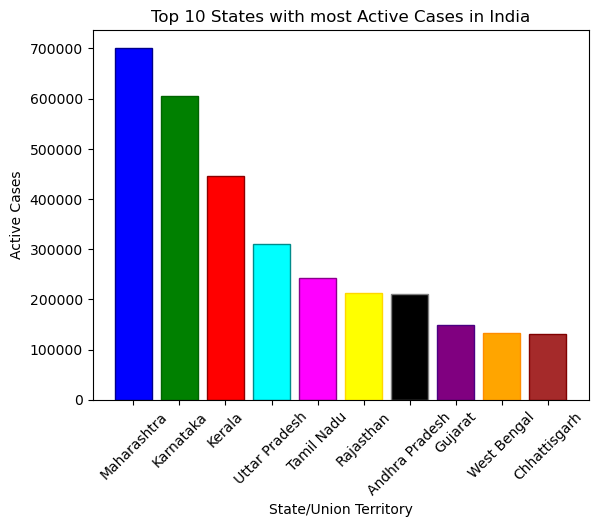

In [11]:
highest_active_case=statewise.sort_values(by = "Active cases",ascending = False).head(10)

x=highest_active_case.index

y=highest_active_case["Active cases"].head(10)

plt.xlabel('State/Union Territory')

plt.ylabel('Active Cases')

plt.title('Top 10 States with most Active Cases in India')

plt.xticks(rotation=45)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']

edge_colors = ['darkblue', 'darkgreen', 'darkred', 'darkcyan', 'darkmagenta', 'gold', 'grey', 'indigo', 'darkorange', 'maroon']

plt.bar(x, y, color=colors, edgecolor=edge_colors)

plt.show()



<BarContainer object of 10 artists>

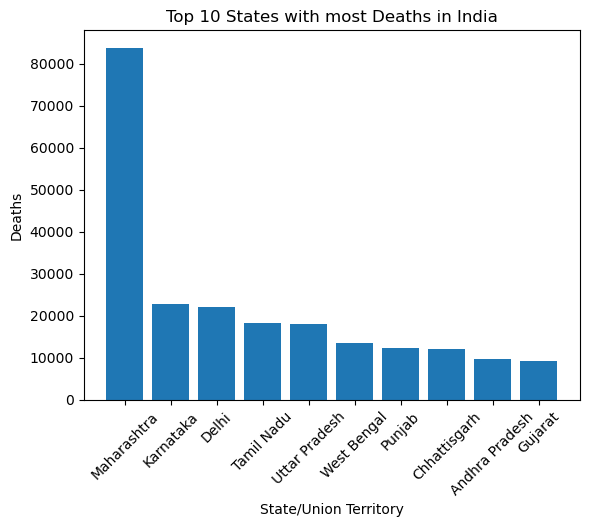

In [12]:
highest_death_case=statewise.sort_values(by = "Deaths",ascending = False).head(10)

x=highest_death_case.index

y=highest_death_case["Deaths"].head(10)

plt.xlabel('State/Union Territory')

plt.ylabel('Deaths')

plt.title('Top 10 States with most Deaths in India')

plt.xticks(rotation=45)

plt.bar(x,y)



In [45]:
highest_active_case=statewise.sort_values(by = "Active cases",ascending = False).head(10)

highest_active_case


Active cases  Confirmed      Cured   Deaths
State/UnionTerritory                                             
Maharashtra               701614.0  5433506.0  4927480.0  83777.0
Karnataka                 605515.0  2272374.0  1674487.0  22838.0
Kerala                    445692.0  2200706.0  1846105.0   6612.0
Uttar Pradesh             310783.0  1637663.0  1483249.0  18072.0
Tamil Nadu                242929.0  1664350.0  1403052.0  18369.0
Rajasthan                 212753.0   879664.0   713129.0   7080.0
Andhra Pradesh            211554.0  1475372.0  1254291.0   9580.0
Gujarat                   148297.0   766201.0   660489.0   9269.0
West Bengal               131948.0  1171861.0  1026492.0  13576.0
Chhattisgarh              131245.0   925531.0   823113.0  12036.0

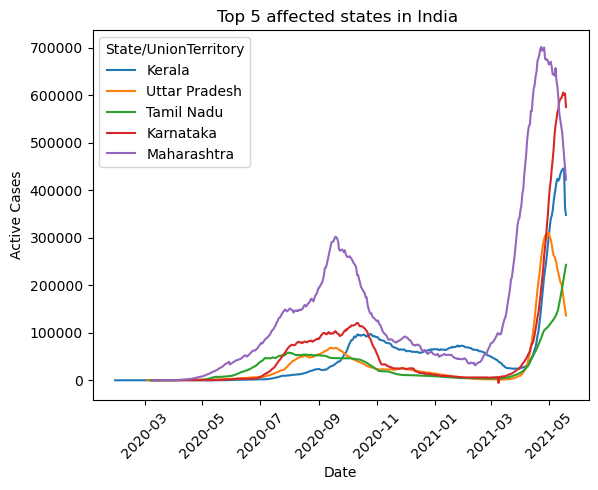

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
covid_data = pd.read_csv("/Users/amitkishorea/Downloads/covid_19_india.csv")

# Calculate active cases
covid_data["Active cases"] = covid_data["Confirmed"] - (covid_data["Cured"] + covid_data["Deaths"])

# Convert 'Date' column to datetime type
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Plot active cases for Delhi only
sns.lineplot(data=covid_data[covid_data["State/UnionTerritory"].isin(["Maharashtra","Karnataka","Kerala","Uttar Pradesh"
,"Tamil Nadu"])], x='Date', y='Active cases', hue="State/UnionTerritory")

plt.title('Top 5 affected states in India ')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)
plt.show()


In [47]:
vaccine_data=pd.read_csv("/Users/amitkishorea/Downloads/covid_vaccine_statewise.csv")


In [48]:
vaccine_data.head(10)

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   
5  21/01/2021  India                  365965.0   32226.0  12600.0   
6  22/01/2021  India                  549381.0   36988.0  14115.0   
7  23/01/2021  India                  759008.0   43076.0  15605.0   
8  24/01/2021  India                  835058.0   49851.0  18111.0   
9  25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN 

In [49]:
vaccine_data.tail(10)

Updated On        State  Total Doses Administered  Sessions   Sites   \
7835  06/08/2021  West Bengal                31774086.0  930084.0   2485.0   
7836  07/08/2021  West Bengal                32029325.0  727057.0   1833.0   
7837  08/08/2021  West Bengal                32098768.0  271684.0    584.0   
7838  09/08/2021  West Bengal                32390378.0  866173.0   2086.0   
7839  10/08/2021  West Bengal                       NaN       NaN      NaN   
7840  11/08/2021  West Bengal                       NaN       NaN      NaN   
7841  12/08/2021  West Bengal                       NaN       NaN      NaN   
7842  13/08/2021  West Bengal                       NaN       NaN      NaN   
7843  14/08/2021  West Bengal                       NaN       NaN      NaN   
7844  15/08/2021  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  Second Dose Administered  \
7835               22745949.0                 9028137.0   
7836               22959053.0                 9070272.0   
7837               23017864.0                 9080904.0   
7838               23257417.0                 9132961.0   
7839                      NaN                       NaN   
7840                      NaN                       NaN   
7841                      NaN                       NaN   
7842                      NaN                       NaN   
7843                      NaN                       NaN   
7844                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
7835                 16949389.0                   14819919.0   
7836                 17066449.0                   14958036.0   
7837                 17098464.0                   14995446.0   
7838                 17234284.0                   15151152.0   
7839                        NaN                          NaN   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
7835                            4778.0  ...                        11349241.0   
7836                            4840.0  ...                        11526470.0   
7837                            4858.0  ...                        11573400.0   
7838                            4942.0  ...                        11765330.0   
7839                               NaN  ...                               NaN   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
7835                        11608035.0                       8816810.0   
7836                        11661738.0                       8841117.0   
7837                        11676065.0                       8849303.0   
7838                        11743594.0                       8881454.0   
7839                               NaN                             NaN   
7840                               NaN                             NaN   
7841                               NaN                             NaN   
7842                               NaN                             NaN   
7843                               NaN                             NaN   
7844                               NaN                             NaN   

      18-44 Years(Individuals Vaccinated)  \
7835                                  Na

In [54]:
vaccine_data.rename(columns = {"Updated On" : "vaccine_Date"}, inplace = True)

In [55]:
vaccine_data.head(10)

vaccine_Date  State  Total Doses Administered  Sessions   Sites   \
0   16/01/2021  India                   48276.0    3455.0   2957.0   
1   17/01/2021  India                   58604.0    8532.0   4954.0   
2   18/01/2021  India                   99449.0   13611.0   6583.0   
3   19/01/2021  India                  195525.0   17855.0   7951.0   
4   20/01/2021  India                  251280.0   25472.0  10504.0   
5   21/01/2021  India                  365965.0   32226.0  12600.0   
6   22/01/2021  India                  549381.0   36988.0  14115.0   
7   23/01/2021  India                  759008.0   43076.0  15605.0   
8   24/01/2021  India                  835058.0   49851.0  18111.0   
9   25/01/2021  India                 1277104.0   55151.0  19682.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   
5                 365965.0                       0.0   
6                 549381.0                       0.0   
7                 759008.0                       0.0   
8                 835058.0                       0.0   
9                1277104.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
6                        NaN                          NaN   
7                        NaN                          NaN   
8                        NaN                          NaN   
9                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   
5                               NaN  ...                               NaN   
6                               NaN  ...                               NaN   
7                               NaN  ...                               NaN   
8                               NaN  ...                               NaN   
9                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
5                               NaN                             NaN   
6                               NaN                             NaN   
7                               NaN                             NaN   
8                               NaN                             NaN   
9                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                          

In [70]:
vaccine_data.to_string()

'     vaccine_Date                                     State  Total Doses Administered    Sessions   Sites   First Dose Administered  Second Dose Administered  Male (Doses Administered)  Female (Doses Administered)  Transgender (Doses Administered)   Covaxin (Doses Administered)  CoviShield (Doses Administered)  Sputnik V (Doses Administered)     AEFI  18-44 Years (Doses Administered)  45-60 Years (Doses Administered)  60+ Years (Doses Administered)  18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  Total Individuals Vaccinated\n0      16/01/2021                                     India                   48276.0      3455.0   2957.0                  48276.0                       0.0                        NaN                          NaN                               NaN                          579.0                          476

In [56]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [57]:
vaccine_data.isnull().sum()

vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [59]:
vaccine_data.drop(columns = ["Sputnik V (Doses Administered)",
                             "AEFI","18-44 Years (Doses Administered)",
                             "45-60 Years (Doses Administered)",       
                             "60+ Years (Doses Administered)",         
                             "18-44 Years(Individuals Vaccinated)",    
                             "45-60 Years(Individuals Vaccinated)",    
                             "60+ Years(Individuals Vaccinated)"], axis=1)

vaccine_Date        State  Total Doses Administered  Sessions   Sites   \
0      16/01/2021        India                   48276.0    3455.0   2957.0   
1      17/01/2021        India                   58604.0    8532.0   4954.0   
2      18/01/2021        India                   99449.0   13611.0   6583.0   
3      19/01/2021        India                  195525.0   17855.0   7951.0   
4      20/01/2021        India                  251280.0   25472.0  10504.0   
...           ...          ...                       ...       ...      ...   
7840   11/08/2021  West Bengal                       NaN       NaN      NaN   
7841   12/08/2021  West Bengal                       NaN       NaN      NaN   
7842   13/08/2021  West Bengal                       NaN       NaN      NaN   
7843   14/08/2021  West Bengal                       NaN       NaN      NaN   
7844   15/08/2021  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  Second Dose Administered  \
0                     48276.0                       0.0   
1                     58604.0                       0.0   
2                     99449.0                       0.0   
3                    195525.0                       0.0   
4                    251280.0                       0.0   
...                       ...                       ...   
7840                      NaN                       NaN   
7841                      NaN                       NaN   
7842                      NaN                       NaN   
7843                      NaN                       NaN   
7844                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)   Covaxin (Doses Administered)  \
0                                  NaN                          579.0   
1                                  NaN                          635.0   
2                                  NaN                         1299.0   
3                                  NaN                         3017.0   
4                                  NaN                         3946.0   
...                                ...                            ...   
7840                               NaN                            NaN   
7841                               NaN                            NaN   
7842                               NaN                            NaN   
7843                               NaN                            NaN   
7844                               NaN                            NaN   

      CoviShield (Doses Administered)  Male(Individuals Vaccinated)  \
0                             47697.0                       23757.0   
1                             57969.0                       27348.0   
2                             98150.0                       41361.0   
3                            192508.0                       81901.0   
4                            247334.0                       98111.0   
...                               ...                           ...   
7840                              NaN                           NaN   
7841                              NaN                           NaN   
7842                              NaN                         

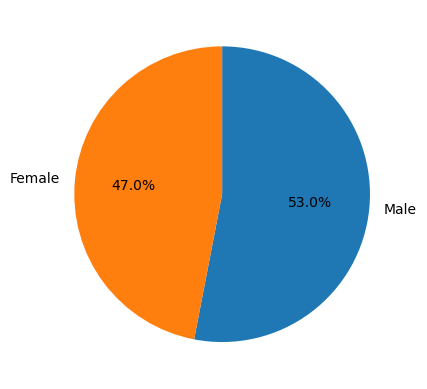

In [68]:
male=vaccine_data["Male(Individuals Vaccinated)"].sum()

female = vaccine_data["Female(Individuals Vaccinated)"].sum()  

plt.pie([male, female], labels=["Male", "Female"],startangle=90,autopct='%1.1f%%',counterclock = False)

plt.show()


In [76]:
vaccine=vaccine_data[vaccine_data.State!="India"]

In [77]:
vaccine

vaccine_Date                        State  Total Doses Administered  \
212    16/01/2021  Andaman and Nicobar Islands                      23.0   
213    17/01/2021  Andaman and Nicobar Islands                      23.0   
214    18/01/2021  Andaman and Nicobar Islands                      42.0   
215    19/01/2021  Andaman and Nicobar Islands                      89.0   
216    20/01/2021  Andaman and Nicobar Islands                     124.0   
...           ...                          ...                       ...   
7840   11/08/2021                  West Bengal                       NaN   
7841   12/08/2021                  West Bengal                       NaN   
7842   13/08/2021                  West Bengal                       NaN   
7843   14/08/2021                  West Bengal                       NaN   
7844   15/08/2021                  West Bengal                       NaN   

      Sessions   Sites   First Dose Administered  Second Dose Administered  \
212        2.0      2.0                     23.0                       0.0   
213        2.0      2.0                     23.0                       0.0   
214        9.0      2.0                     42.0                       0.0   
215       12.0      2.0                     89.0                       0.0   
216       16.0      3.0                    124.0                       0.0   
...        ...      ...                      ...                       ...   
7840       NaN      NaN                      NaN                       NaN   
7841       NaN      NaN                      NaN                       NaN   
7842       NaN      NaN                      NaN                       NaN   
7843       NaN      NaN                      NaN                       NaN   
7844       NaN      NaN                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
212                        12.0                         11.0   
213                        12.0                         11.0   
214                        29.0                         13.0   
215                        53.0                         36.0   
216                        67.0                         57.0   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                                0.0  ...                               NaN   
213                                0.0  ...                               NaN   
214                                0.0  ...                               NaN   
215                                0.0  ...                               NaN   
216                                0.0  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                                NaN                             NaN   
213                                NaN                             NaN   
214                                NaN                             NaN   
215                                NaN                             NaN   
216                                NaN     

In [84]:
vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace=True)
vaccine.head()

/var/folders/0m/hzhxrns90cgfjmm8hm25471c0000gn/T/ipykernel_21475/294338814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace=True)


vaccine_Date                        State  Total Doses Administered  \
212   16/01/2021  Andaman and Nicobar Islands                      23.0   
213   17/01/2021  Andaman and Nicobar Islands                      23.0   
214   18/01/2021  Andaman and Nicobar Islands                      42.0   
215   19/01/2021  Andaman and Nicobar Islands                      89.0   
216   20/01/2021  Andaman and Nicobar Islands                     124.0   

     Sessions   Sites   First Dose Administered  Second Dose Administered  \
212       2.0      2.0                     23.0                       0.0   
213       2.0      2.0                     23.0                       0.0   
214       9.0      2.0                     42.0                       0.0   
215      12.0      2.0                     89.0                       0.0   
216      16.0      3.0                    124.0                       0.0   

     Male (Doses Administered)  Female (Doses Administered)  \
212                       12.0                         11.0   
213                       12.0                         11.0   
214                       29.0                         13.0   
215                       53.0                         36.0   
216                       67.0                         57.0   

     Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                               0.0  ...                               NaN   
213                               0.0  ...                               NaN   
214                               0.0  ...                               NaN   
215                               0.0  ...                               NaN   
216                               0.0  ...                               NaN   

     45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                               NaN                             NaN   
213                               NaN                             NaN   
214                               NaN                             NaN   
215                               NaN                             NaN   
216                               NaN                             NaN   

     18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
212                                  NaN                                  NaN   
213                                  NaN                                  NaN   
214                                  NaN                                  NaN   
215                                  NaN                                  NaN   
216                                  NaN                                  NaN   

     60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
212                                NaN                           NaN   
213                                NaN                           NaN   
214                                NaN                           NaN   
215                                NaN                           NaN   
216                                NaN                           NaN   

     Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
212                             NaN                                  NaN   
213                             NaN                                  NaN   
214                             NaN                                  NaN   
215                             NaN                                  NaN   
216                             NaN                                  NaN   

     Total  
212   23.0  
213   23.0  
214   42.0  
215   89.0  
216  124.0  

[5 rows x 24 columns]

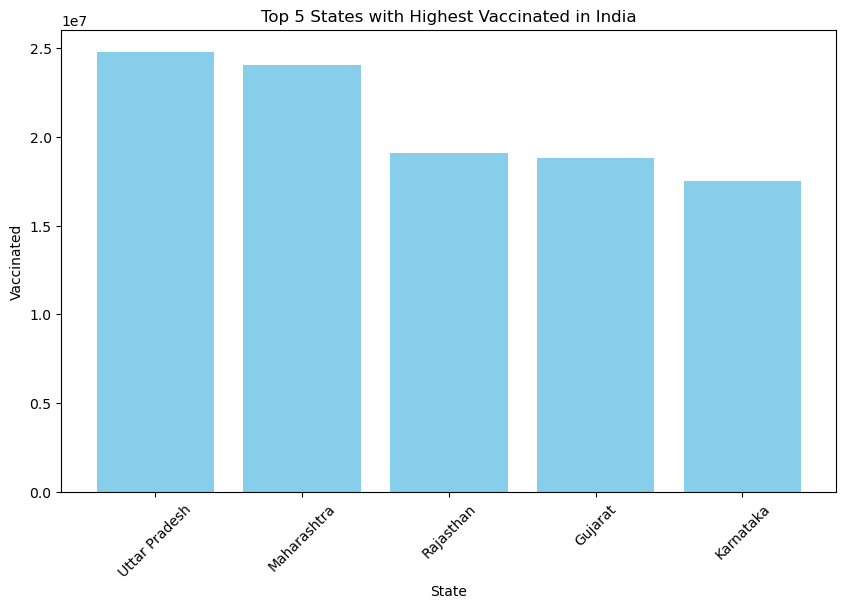

In [109]:

highest_vaccine_state = vaccine.sort_values(by="Total", ascending=False).drop_duplicates(subset=['State']).head(5)

x = highest_vaccine_state['State']  

y = highest_vaccine_state['Total'] 

plt.figure(figsize=(10, 6)) 

plt.bar(x, y, color='skyblue')  


plt.xlabel('State')

plt.ylabel('Vaccinated')

plt.title('Top 5 States with Highest Vaccinated in India')

plt.xticks(rotation=45)  

plt.show()

